In [1]:
#######################Linear and nonlinear regression Closed-form, GD & SGD#########################
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-3,3,0.05)
X = X.reshape([np.size(X),1])
y = X*np.cos(X)

In [2]:
w_cl= np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
w_cl

array([[-0.55032547]])

In [3]:
# GD
w_gd = np.zeros(np.shape(X)[1])
w_gd = w_gd.reshape(np.shape(X)[1],1)
jj=0
alpha = 0.0001
while jj<100:
    w_gd = w_gd - alpha *np.matmul(X.T , (np.matmul(X,w_gd) - y))
    jj += 1
w_gd

array([[-0.53626183]])

In [4]:
# SGD
w_sgd = np.zeros(np.shape(X)[1])
jj=0
alpha = 0.02
while jj<80:
    for i in range(np.shape(X)[0]):
        w_sgd = w_sgd + alpha*X[i,:] * (y[i] - np.matmul(w_sgd.T,X[i,:]))
    jj += 1
w_sgd

array([-0.83763525])

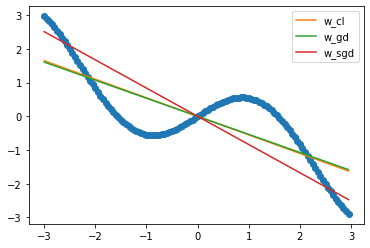

In [5]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(X,w_cl),label = "w_cl")
plt.plot(X,np.matmul(X,w_gd),label = "w_gd")
plt.plot(X,np.matmul(X,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()

In [6]:
#########################Feature Engineering#################################
num =10
l = np.random.choice(len(X),num)
l = X[l,:]
l = np.unique(l)
beta = 0.3
similarities = {}
for x in X[:,0]:
    for i in l:
        similarities[x,i] =  np.exp(-beta * np.abs(x-i)**2 )
new_x = np.array(list(similarities.values()))
new_x = new_x.reshape([np.shape(X)[0] , np.size(l)])

In [7]:
w_cl = np.matmul(np.linalg.inv(np.matmul(new_x.T,new_x)),np.matmul(new_x.T,y))
w_cl

array([[ 1.51907085e+01],
       [-7.09541877e+01],
       [ 3.95951531e+03],
       [-1.62832778e+04],
       [ 1.40365373e+04],
       [-1.74445605e+03],
       [ 1.05924620e+02],
       [-2.86043616e+01],
       [ 1.01354384e+01]])

In [8]:
# GD
w_gd = np.zeros(np.shape(new_x)[1])
w_gd = w_gd.reshape(np.shape(new_x)[1],1)
jj=0
alpha = 0.001
while True:
    old_w = w_gd
    w_gd = w_gd - alpha *np.matmul(new_x.T , (np.matmul(new_x,w_gd) - y))
    
    if np.linalg.norm(w_gd -old_w)<0.001:
        break
    elif jj>3000:
        break
    
    jj += 1
print("Converged to  w = ",w_gd," on iter: ",jj)

Converged to  w =  [[ 3.86177709]
 [-2.65495399]
 [-1.43488209]
 [-0.47050325]
 [ 0.02513525]
 [ 1.6290128 ]
 [ 2.76091492]
 [-1.61818952]
 [-2.51750481]]  on iter:  1168


In [9]:
# SGD
w_sgd = np.zeros(np.shape(new_x)[1])
jj=0
alpha = 0.005
while True:
    old_w = w_sgd
    for i in range(np.shape(new_x)[0]):
        w_sgd = w_sgd + alpha*new_x[i,:] * (y[i] - np.matmul(w_sgd.T,new_x[i,:]))
    
    if np.linalg.norm(w_sgd -old_w)<0.001:
        break
    elif jj>3000:
        break
    
    jj += 1
print("Converged to  w = ",w_sgd," on iter: ",jj)

Converged to  w =  [ 4.47420098 -3.6169815  -1.13749388 -0.20618483  0.2382019   1.55951411
  2.38169193 -1.4960303  -2.48037261]  on iter:  1016


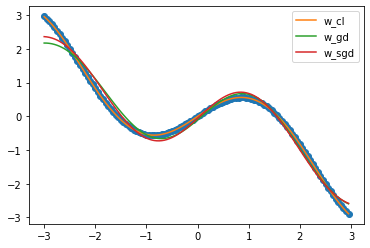

In [10]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(new_x,w_cl),label = "w_cl")
plt.plot(X,np.matmul(new_x,w_gd),label = "w_gd")
plt.plot(X,np.matmul(new_x,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()